In [1]:
# data manipulation
import numpy as np
import pandas as pd

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [4]:
df = pd.read_csv(r'C:\Users\Abdullah Ahamed\Downloads\DS2_C5_S6_KCHouse_Data_Practice.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
d= ['id','date','zipcode']
df= df.drop(d,axis=1)

In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Standard scaler

In [13]:
#Scaling the datset

from sklearn.preprocessing import StandardScaler
numerics = ["int16", "int32","int64","float16","float32","float64"]
new_df = df.select_dtypes (include=numerics)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()), columns=new_df.columns) 
df_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


<AxesSubplot:>

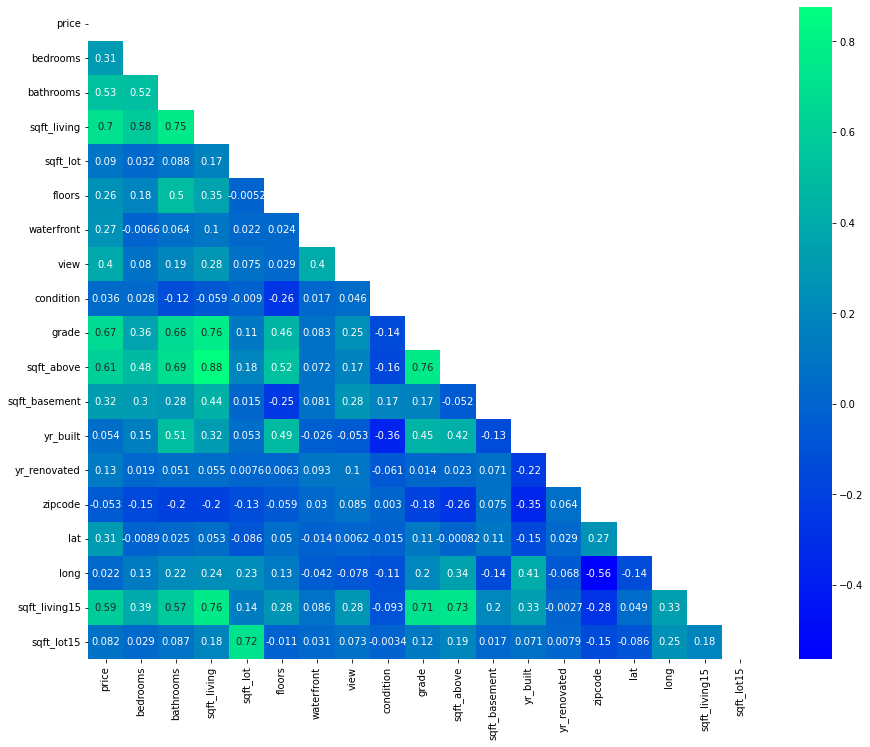

In [16]:
cor= df.corr()

mask = np.triu(np.ones_like(df.corr()))

plt.figure(figsize=(15,12))
sns.heatmap(cor, mask=mask, annot=True, cmap='winter')

In [17]:
#splitting the data

from sklearn.model_selection import train_test_split
X = np.array(df_scaled.drop(columns="price", axis = 1))
Y = np.array(df_scaled["price"])
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state=5)

In [18]:
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [19]:
Y

array([-0.86671733, -0.00568792, -0.98084935, ..., -0.37586519,
       -0.38158814, -0.58588173])

## T2 Linear Reg

In [38]:
from sklearn.linear_model import LinearRegression

l_model = LinearRegression().fit(x_train, y_train) 
rsq= l_model.score(x_train, y_train).round(4)
print("Train score:",rsq)

rsq2= l_model.score (x_test, y_test).round(4)
print("Test score:",rsq2)

Train score: 0.6996
Test score: 0.6999


In [26]:
y_pred = l_model.predict(x_test)
print("predicted response:", y_pred, sep="\n")

predicted response:
[-0.30660229 -1.20259838 -0.1540144  ...  0.31205005  0.25077076
 -0.11446362]


MSE

In [29]:
from sklearn.metrics import mean_squared_error

MSE= mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("MSE:" ,MSE)
print("RMSE:",RMSE)

MSE: 0.30380731426421786
RMSE: 0.5511871862300664


## Bagging with RF

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
b_m = RandomForestRegressor(random_state=42, n_jobs=1,max_depth=5,
                            n_estimators=100, oob_score=True).fit(x_train,y_train)

b_train= b_m.score(x_train,y_train).round(3)
print("Bagging Train: ",b_train)

b_test= b_m.score(x_test,y_test).round(3)
print("Bagging Test: ",b_test)

Bagging Train:  0.798
Bagging Test:  0.779


In [39]:
data = pd.DataFrame({"Method":["Linear regression", "Random forest"], 
                     "Train score":[rsq,b_train], "Test score":[rsq2,b_test]})
data

,Method,Train score,Test score
0,Linear regression,0.6996,0.6999
1,Random forest,0.7980,0.7790


### Interpretation Random Forest has better results than LR Model

Prediction

In [40]:
y_predic= b_m.predict(x_test)
print("Prediction: ",y_predic)

Prediction:  [-0.53774608 -0.79664696 -0.62476669 ...  0.38549     0.40742947
  0.28816781]


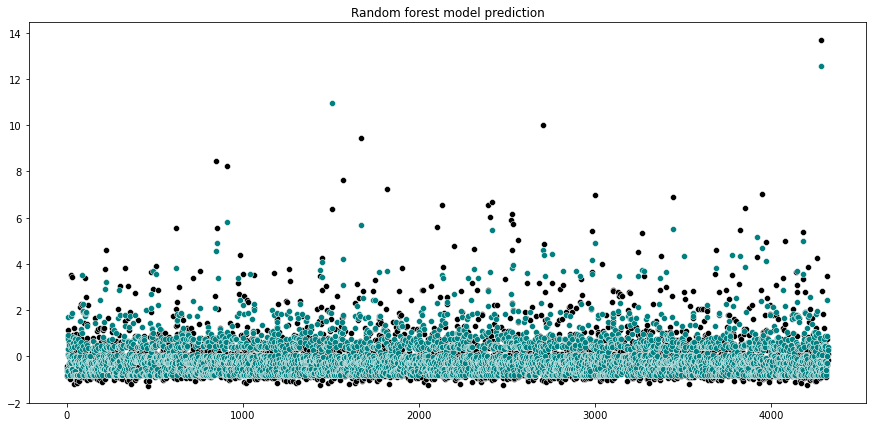

In [46]:
plt.figure(figsize=(15,7))
e = list(np.arange(0,len(y_test)))
sns.scatterplot(e,y_test,color="black")
sns.scatterplot(e,y_predic,color="Teal")
plt.title("Random forest model prediction")
plt.show()

#### Interpretation Actual and Predicted values are closer to each other ie Model can predict correctly